In [110]:
import pandas as pd
import numpy as np
from src.helpers import SAMOTHRACE_SHEET_NAMES

df = pd.read_excel('./data/samothrace/samothrace.xlsx', sheet_name=SAMOTHRACE_SHEET_NAMES)
df['Altar Court']

# need to combine all other measurements from other sheets
new_df = pd.DataFrame(pd.concat(list(map(lambda x: x['Hole Length at Base'], df.values())), ignore_index=True))

<AxesSubplot: >

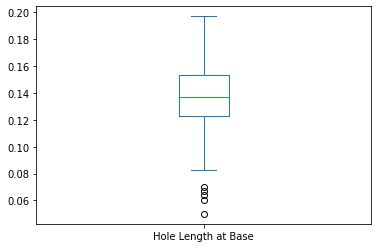

In [111]:
#for sheet_name in SAMOTHRACE_SHEET_NAMES:
std_dev = new_df['Hole Length at Base'].std()
mean = new_df['Hole Length at Base'].mean()
num_devs = 3

# remove outliers (x >= 3 std deviations from mean)
new_df = new_df[(new_df['Hole Length at Base'] <= mean+(num_devs * std_dev))]

new_df['quartiles'] = pd.qcut(new_df['Hole Length at Base'], 4, ['q1', 'q2', 'q3', 'q4'])

# need to fix the box/whisker
new_df['Hole Length at Base'].plot.box()

<AxesSubplot: >

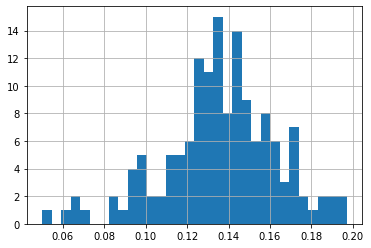

In [138]:
# how to make a the relative frequency histogram?
length_counts = new_df['Hole Length at Base'].value_counts() / len(new_df)

# frequency histogram for hole length at base
new_df['Hole Length at Base'].hist(bins=32, label="Hole Length at Base")